## Question 1

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# (1) load the data into Pandas dataframe
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Extract two dataframes with 4 features
df_0 = df[df['DEATH_EVENT']==0][['creatinine_phosphokinase', 'serum_creatinine', 
                                'serum_sodium', 'platelets']]
df_1 = df[df['DEATH_EVENT']==1][['creatinine_phosphokinase', 'serum_creatinine', 
                                'serum_sodium', 'platelets']]

In [4]:
# Calculate correlation matrice
M0 = df_0.corr()
M1 = df_1.corr()

In [5]:
M1

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.033407,0.148823,0.078808
serum_creatinine,-0.033407,1.000000,-0.094011,-0.029384
serum_sodium,0.148823,-0.094011,1.000000,0.141284
platelets,0.078808,-0.029384,0.141284,1.000000


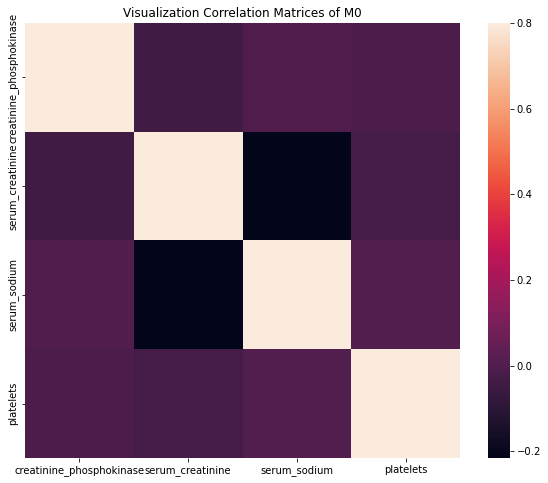

In [6]:
# Save the plots into two separate files
plt.figure(figsize=(10,8))
sns.heatmap(M0, vmax=.8, square=True)
plt.title('Visualization Correlation Matrices of M0')
plt.savefig('M0.png')

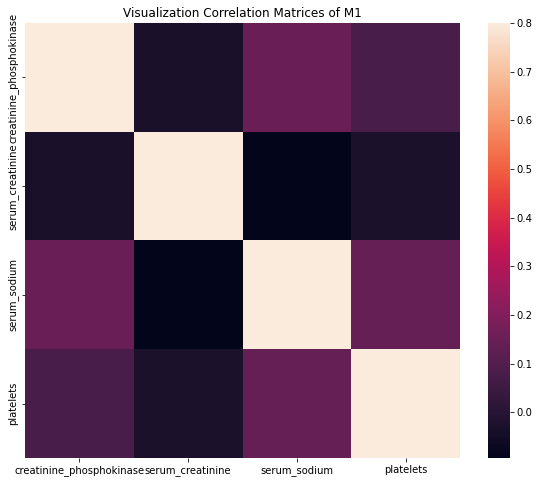

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(M1, vmax=.8, square=True)
plt.title('Visualization Correlation Matrices of M1')
plt.savefig('M1.png')

## Question 2

In [17]:
# Write a plot and calculate function for general use
def linear_plot(x_test, predicted, y_test, model, feature):
    # (d) plot predicted and actual values in Xtest
    plt.figure(figsize=(8,8))
    plt.plot(x_test, predicted, c='Orange', label='Predict')
    plt.scatter(x_test, y_test, marker='o', label='Actual') 
    plt.legend()
    plt.xlabel(feature[0])
    plt.ylabel(feature[1])
    plt.title(f'{model} predict plot')
    plt.show()

def calc_sse(y_test, predicted):
    # (e) compute and print the corresponding loss function
    sse = np.sum((y_test - predicted) ** 2)
    print(f'SSE value: {sse}')

In [18]:
def five_models(df):
    # Train-test split
    train, test = train_test_split(df, test_size=0.5, random_state=7)
    # Sort the train and test datafrme by x variable platelets
    train_sort = train.sort_values(['platelets'], axis=0)
    test_sort = test.sort_values(['platelets'], axis=0)

    # I chose the Group 2 for X and Y features
    feature = ('platelets', 'serum_sodium')
    # Linear Regression
    model = LinearRegression()

    # Initial and reshape x_train, y_train, x_test, y_test
    x_train = np.array(train_sort[feature[0]]).reshape(-1, 1)
    y_train = np.array(train_sort[feature[1]]).reshape(-1, 1)
    x_test = np.array(test_sort[feature[0]]).reshape(-1, 1)
    y_test = np.array(test_sort[feature[1]]).reshape(-1, 1)

    # (a) fit the model on Xtrain
    model.fit(x_train, y_train)

    print('Model Name: ', model)

    # (b) print the weights (a, b, . . .)
    print('The Weights: Coef:', model.coef_, '\n',
          '      Intercept: ', model.intercept_)

    # (c) compute predicted values using Xtest
    predicted = model.predict(x_test)

    # (d) plot predicted and actual values in Xtest
    linear_plot(x_test, predicted, y_test, model, feature)

    # (e) compute and print the corresponding loss function
    calc_sse(y_test, predicted)

    # Polynomial Regression
    model_list = [PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)]
    for model in model_list:
        print('================================================')
        # (a) transform all data for polynomial regression and fit the model on transformed Xtrain
        x_p = model.fit_transform(x_train)
        x_t = model.fit_transform(x_test)
        lr = LinearRegression()
        lr.fit(x_p,y_train)

        print('Model Name: ', model)

        # (b) print the weights (a, b, . . .)
        print('The Weights: Coef:', lr.coef_, '\n',
              '      Intercept: ', lr.intercept_)

        # (c) compute predicted values using Xtest
        predicted = lr.predict(x_t)

        # (d) plot predicted and actual values in Xtest
        linear_plot(x_test, predicted, y_test, model, feature)
        # (e) compute and print the corresponding loss function
        calc_sse(y_test, predicted)

    # GLM - generalized linear model 1
    print('================================================')
    # Sort the train and test datafrme by x variable platelets
    train_sort = train.sort_values(['platelets'], axis=0)
    test_sort = test.sort_values(['platelets'], axis=0)

    # Initial and reshape x_train, y_train, x_test, y_test
    x_train = train_sort[feature[0]].values
    y_train = train_sort[feature[1]].values
    x_test = test_sort[feature[0]].values
    y_test = test_sort[feature[1]].values

    # (a) fit the model on Xtrain
    coef = np.polyfit(np.log(x_train), y_train, 1)

    # (b) print the weights (a, b, . . .)
    model_name = 'y = a log x + b'
    print('Model Name: ', model_name)
    print(f'The Weights: {coef}')
    model = np.poly1d(coef)

    # (c) compute predicted values using Xtest
    predicted = model(np.log(x_test))

    # (d) plot predicted and actual values in Xtest
    linear_plot(x_test, predicted, y_test, model_name, feature)

    # (e) compute and print the corresponding loss function
    calc_sse(y_test, predicted)

    # GLM - generalized linear model 2
    print('================================================')
    # (a) fit the model on Xtrain
    coef = np.polyfit(np.log(x_train), np.log(y_train), 1)

    # (b) print the weights (a, b, . . .)
    model_name = 'log y = a log x + b'
    print('Model Name: ', model_name)
    print(f'The Weights: {coef}')
    model = np.poly1d(coef)

    # (c) compute predicted values using Xtest
    predicted = np.exp(model(np.log(x_test)))

    # (d) plot predicted and actual values in Xtest
    linear_plot(x_test, predicted, y_test, 'log y = a log x + b', feature)

    # (e) compute and print the corresponding loss function
    calc_sse(y_test, predicted)

Model Name:  LinearRegression()
The Weights: Coef: [[5.53790128e-06]] 
       Intercept:  [135.31479507]


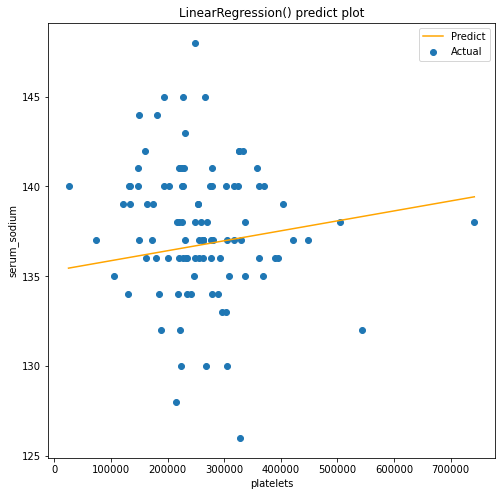

SSE value: 1501.4022497378555
Model Name:  PolynomialFeatures()
The Weights: Coef: [[ 0.00000000e+00 -9.61214570e-06  1.94443076e-11]] 
       Intercept:  [137.82358082]


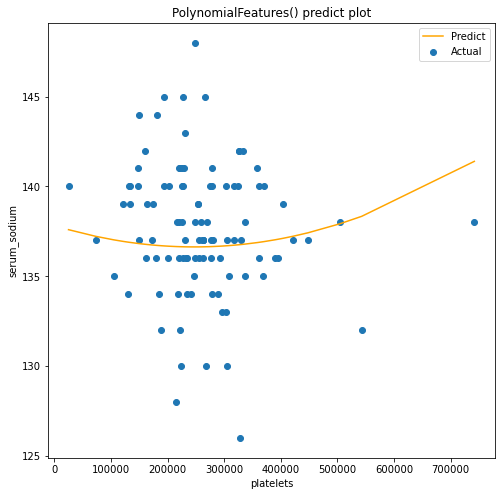

SSE value: 1444.6256465569443
Model Name:  PolynomialFeatures(degree=3)
The Weights: Coef: [[ 0.00000000e+00 -6.37465446e-05  1.68515236e-10 -1.12824789e-16]] 
       Intercept:  [143.50242545]


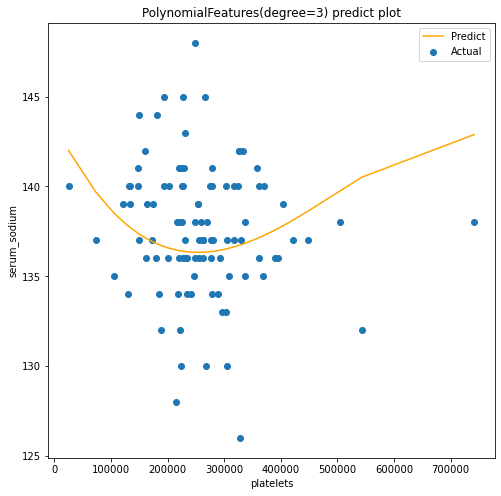

SSE value: 1500.5046412652475
Model Name:  y = a log x + b
The Weights: [  0.77871516 127.12392911]


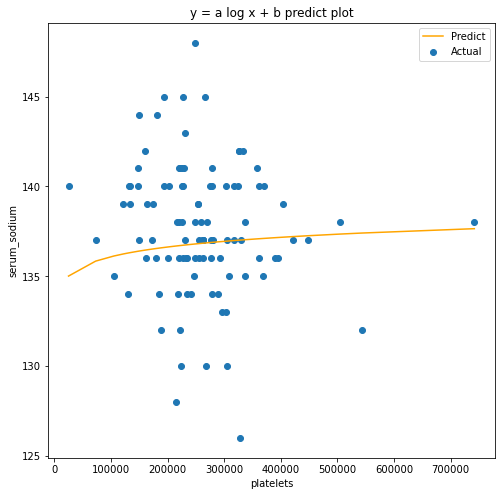

SSE value: 1460.9291512784957
Model Name:  log y = a log x + b
The Weights: [0.00574385 4.84664302]


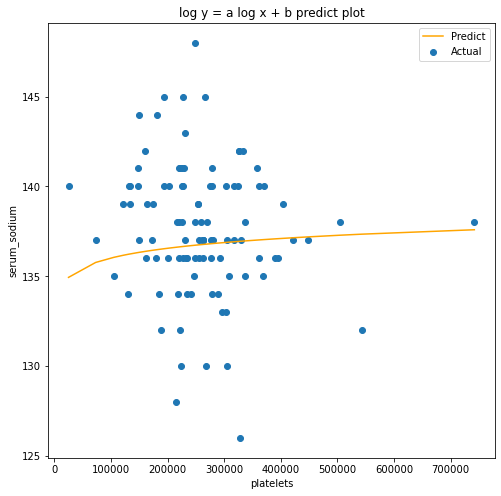

SSE value: 1473.3749544659952


In [19]:
five_models(df_0)

Model Name:  LinearRegression()
The Weights: Coef: [[-6.39118593e-06]] 
       Intercept:  [136.67846817]


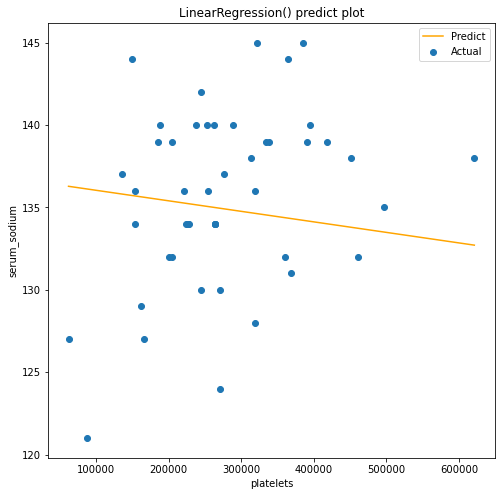

SSE value: 1470.460448924383
Model Name:  PolynomialFeatures()
The Weights: Coef: [[ 0.00000000e+00  1.29571098e-05 -4.07457641e-11]] 
       Intercept:  [134.66490602]


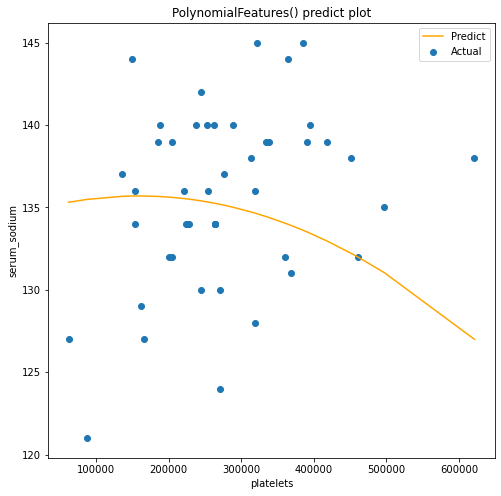

SSE value: 1601.7347062493568
Model Name:  PolynomialFeatures(degree=3)
The Weights: Coef: [[ 0.00000000e+00 -3.45946438e-05  1.80186962e-10 -3.00154595e-16]] 
       Intercept:  [137.47230015]


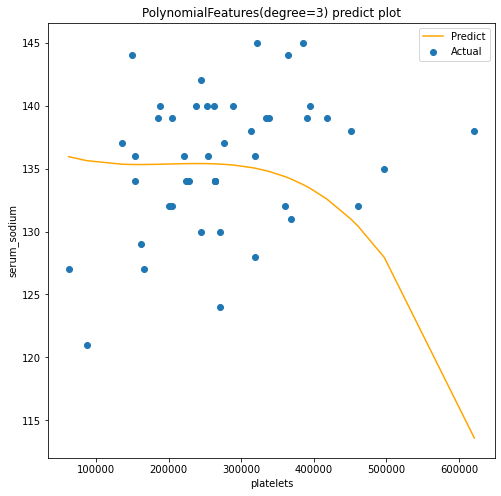

SSE value: 2130.4549338692736
Model Name:  y = a log x + b
The Weights: [ -0.99564136 147.40676726]


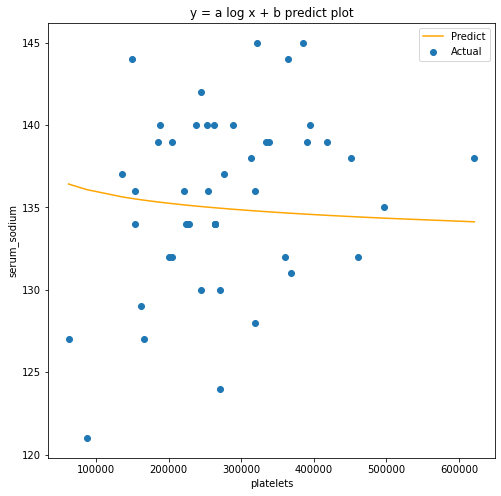

SSE value: 1425.0931114314167
Model Name:  log y = a log x + b
The Weights: [-0.00778569  5.00160715]


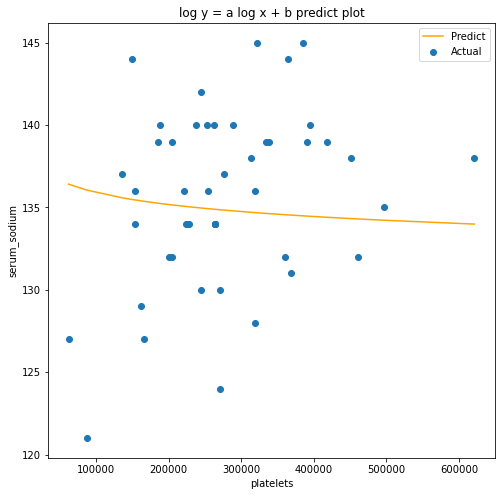

SSE value: 1436.1706182808744


In [20]:
five_models(df_1)